In [118]:
import glob
import scipy
import matplotlib.pyplot as plt
import numpy as np
import json
import time
from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const

from data.constant import wavelength_list_eve,wavelength_chianti
from gaussian_fit_eve import gaussian_fit_eve

In [2]:
eve_files=sorted(glob.glob('data/EVE_sav/EVS_L2*.sav'))

eve_data=[]
for eve_file in eve_files:
    eve_data.append( scipy.io.readsav(eve_file) )

## read sav files

In [ ]:
eve_files=sorted(glob.glob('data/EVE_sav/EVS_L2*.sav'))
eve_files.__len__()

In [ ]:
eve_data=[]
for eve_file in eve_files:
    eve_data.append( scipy.io.readsav(eve_file) )

In [ ]:
eve_data[0].keys()

In [ ]:
eve_data[0]['irradiance'].shape

In [ ]:
eve_data[0]['irradiance']

In [ ]:
eve_data[0]['wavelength'][1363:1375].shape

In [ ]:
eve_data[0]['wavelength'][1363:1375]

In [ ]:
len(eve_data[0]['yyyydoy'])

## resave irradiance into a dict :obs

In [3]:
obs={}
for i in range(len(eve_data)):
# for i in range(24):

    day=eve_data[i]['yyyydoy'][0]%1000
    # if obs[day] hasn't been created, just create an empty list
    if day not in obs.keys():
        
        obs[day] =np.full((8640,12),np.nan)
    
    index=int(eve_data[i]['sod_time'][0]/10)
    
    flag=np.where(eve_data[i]['sc_flags'] == 0, 1, np.nan)*\
                np.where((eve_data[i]['flags'] == 16) | (eve_data[i]['flags'] == 1), np.nan, 1)
    
    flag=np.tile(flag.T, (12, 1)).T
     
    obs[day][index:index+360]=eve_data[i]['irradiance']*flag

In [ ]:
day

In [ ]:
obs.values().__len__()

In [ ]:
# invalid data num : expected 0
# total data num: 103680
fig,ax=plt.subplots()
for i in obs.keys():
    ax.scatter(i,np.sum(np.isnan(obs[i])),)
ax.set_title("invalid data")

In [ ]:
fig,ax=plt.subplots()
sc=ax.imshow(obs[11],aspect=0.01,vmin=0)
plt.colorbar(sc)

In [ ]:
fig,ax=plt.subplots()
sc=ax.imshow(eve_data[3]['irradiance'],aspect=0.01)
plt.colorbar(sc)
eve_data[3]['sod_time'][0]

## ave of every 10s

### fitting test

In [108]:
g_init = models.Gaussian1D(amplitude=0.005, mean=30.3, stddev=0.0424)

# initial value for fitting
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, wavelength_list_eve, obs[15][0])
mean = g.mean.value

In [110]:
g

<Gaussian1D(amplitude=0.0061438, mean=30.37416666, stddev=0.02864947)>

In [100]:
fit_g.fit_info

{'nfev': 12,
 'fvec': array([-1.91409594e-05, -4.95513012e-05,  3.53504471e-06,  4.85808710e-06,
         1.46108427e-06, -2.93950071e-06, -1.15758494e-06,  3.58438129e-06,
         4.24367901e-06, -9.20320876e-06, -4.99078342e-05, -5.01092902e-05]),
 'fjac': array([[-1.59342310e+00,  8.38567617e-03,  5.10965188e-02,
          1.91248788e-01,  4.39703804e-01,  6.20977563e-01,
          5.38698477e-01,  2.87058056e-01,  9.39610553e-02,
          1.88920978e-02,  2.33327881e-03,  1.77013848e-04],
        [ 8.03112937e-10,  2.41621628e-01,  1.61622777e-01,
          4.16126085e-01,  5.22625383e-01,  1.25023715e-01,
         -4.23372650e-01, -5.09002458e-01, -2.59372015e-01,
         -7.08013819e-02, -1.10478959e-02, -1.01290414e-03],
        [-1.70852280e-01,  2.31276836e-07, -2.41621489e-01,
          4.65926792e-01,  7.62281299e-02, -4.41591742e-01,
         -1.17018191e-01,  4.75098660e-01,  4.60947748e-01,
          1.80132150e-01,  3.62643559e-02,  4.05858366e-03]]),
 'ipvt': array([

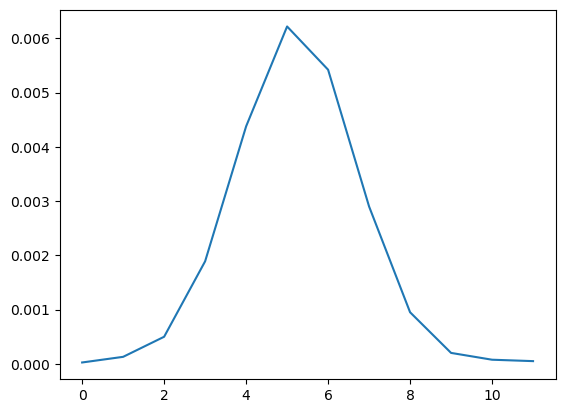

In [101]:
fig,ax=plt.subplots()
ax.plot(obs[11][0])

In [102]:
a=np.full((12,),100)

In [115]:
g_init = models.Gaussian1D(amplitude=0.005, mean=30.3, stddev=0.0424)

# initial value for fitting
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, wavelength_list_eve, a)
mean = g.mean.value

In [116]:
fit_g.fit_info

{'nfev': 32,
 'fvec': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'fjac': array([[-3.46410162e+00,  2.88675135e-01,  2.88675135e-01,
          2.88675135e-01,  2.88675135e-01,  2.88675135e-01,
          2.88675135e-01,  2.88675135e-01,  2.88675135e-01,
          2.88675135e-01,  2.88675135e-01,  2.88675135e-01],
        [-3.63368017e-14,  3.02289326e-14,  1.89655439e-01,
          1.06031238e-01,  2.24070371e-02, -6.12171639e-02,
         -1.44841365e-01, -2.28465566e-01, -3.12089767e-01,
         -3.95713968e-01, -4.79338169e-01, -5.62962370e-01],
        [-1.81409323e-22,  1.78380134e-22,  6.56649465e-23,
          2.77158612e-01,  3.79050338e-01,  4.26197174e-01,
          4.18599120e-01,  3.56256176e-01,  2.39168342e-01,
          6.73356176e-02, -1.59241997e-01, -4.40564502e-01]]),
 'ipvt': array([1, 2, 3], dtype=int32),
 'qtf': array([ 1.12436397e-10,  1.02961692e-26, -1.12340416e-26]),
 'message': 'The relative error between two consecutive iterates is at most 0.00

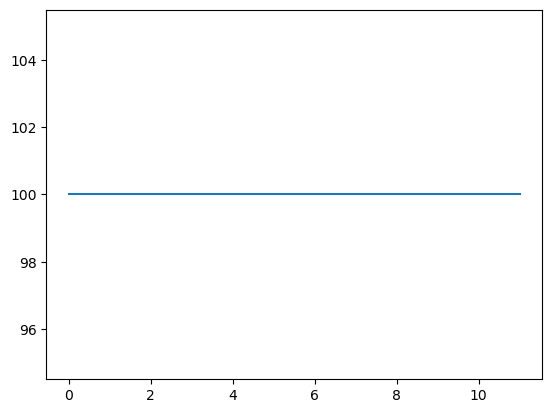

In [105]:
fig,ax=plt.subplots()
ax.plot(a)
# ax.plot(g(a))

In [106]:
g(a)

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [114]:
g

<Gaussian1D(amplitude=0.0061438, mean=30.37416666, stddev=0.02864947)>

In [93]:
a

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
start=time.time()

obs_cen_wave={}
for key in obs.keys():
    if key not in obs_cen_wave.keys():
        obs_cen_wave[key]=np.full((8640,),np.nan)
    for j in np.arange(len(obs[key])):
        obs_cen_wave[key][j]=gaussian_fit_eve(wavelength_list_eve,obs[key][j])

end=time.time()
end-start

727.0932848453522

In [5]:
obs_cen_wave

{11: array([30.3743811 , 30.37433775, 30.37445438, ..., 30.37451108,
        30.37435202, 30.37442525]),
 12: array([30.37429674, 30.37433193, 30.37448087, ..., 30.37422266,
        30.37424663, 30.37436124]),
 13: array([30.37424214, 30.37434011, 30.37438492, ..., 30.37448186,
        30.37445229, 30.37438745]),
 14: array([30.37439068, 30.37435911, 30.37416811, ..., 30.37423074,
        30.3742138 , 30.37430982]),
 15: array([30.37416666, 30.37421266, 30.37425982, ..., 30.37405341,
        30.37435332, 30.37431698]),
 16: array([30.37431439, 30.37422119, 30.37429075, ..., 30.37431739,
        30.37437411, 30.37416036]),
 17: array([30.37426721, 30.37418408, 30.37422403, ..., 30.37429125,
        30.37430479, 30.3743965 ]),
 18: array([30.37422407, 30.37422297, 30.37437429, ..., 30.37444435,
        30.37447344, 30.37437118]),
 19: array([30.37421062, 30.37440283, 30.37431443, ..., 30.37443482,
        30.37434249, 30.37446458]),
 21: array([30.37395797, 30.37398715, 30.37402647, ...,

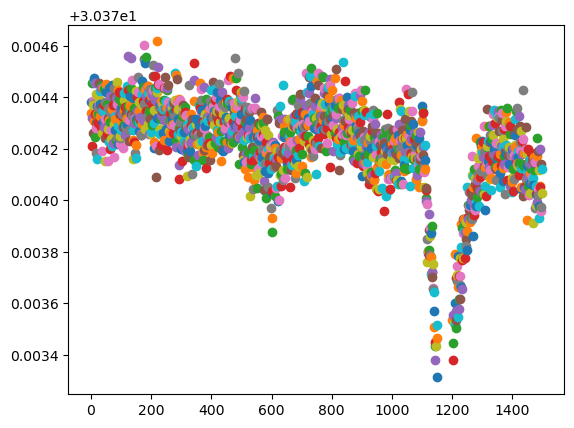

In [5]:
fig,ax=plt.subplots()
for i in range(1500):
    ax.scatter(i,gaussian_fit_eve(wavelength_list_eve,obs[11][i]))
ax.scatter(1170,gaussian_fit_eve(wavelength_list_eve,obs[11][1170]),marker='x',s=900)

In [14]:
gaussian_fit_eve(wavelength_list_eve,obs[11][1170])

nan

In [4]:
irradiance=obs[11][1170]
irradiance

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:

fig,ax=plt.subplots()
sc=ax.imshow(obs[11]*(obs[11]<0),aspect=0.01)
plt.colorbar(sc)

In [ ]:
fig,ax=plt.subplots()
ax.plot(obs.keys())
#不是每天都有数据

ax.set_xlabel('data piece')
ax.set_ylabel('day')
ax.legend()

In [ ]:
## 每天的数据量
fig,ax=plt.subplots()
ax.plot(obs.keys(),[len(obs[key]) for key in obs.keys()])
ax.set_title("data available per day")

ax.set_xlabel('day')
ax.set_ylabel('data amount')
ax.legend()

## plot irradiance

In [20]:
obs_cen_wave

{11: array([30.3743811 , 30.37433775, 30.37445438, ..., 30.37451108,
        30.37435202, 30.37442525]),
 12: array([30.37429674, 30.37433193, 30.37448087, ..., 30.37422266,
        30.37424663, 30.37436124]),
 13: array([30.37424214, 30.37434011, 30.37438492, ..., 30.37448186,
        30.37445229, 30.37438745]),
 14: array([30.37439068, 30.37435911, 30.37416811, ..., 30.37423074,
        30.3742138 , 30.37430982]),
 15: array([30.37416666, 30.37421266, 30.37425982, ..., 30.37405341,
        30.37435332, 30.37431698]),
 16: array([30.37431439, 30.37422119, 30.37429075, ..., 30.37431739,
        30.37437411, 30.37416036]),
 17: array([30.37426721, 30.37418408, 30.37422403, ..., 30.37429125,
        30.37430479, 30.3743965 ]),
 18: array([30.37422407, 30.37422297, 30.37437429, ..., 30.37444435,
        30.37447344, 30.37437118]),
 19: array([30.37421062, 30.37440283, 30.37431443, ..., 30.37443482,
        30.37434249, 30.37446458]),
 21: array([30.37395797, 30.37398715, 30.37402647, ...,

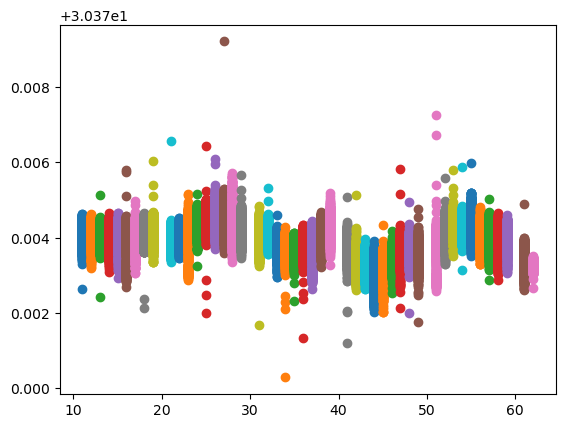

In [6]:
fig,ax=plt.subplots()
for key in obs_cen_wave.keys():
    key_list=np.tile(key, (8640, 1))
    ax.scatter(key_list,obs_cen_wave[key])

### one day FFT

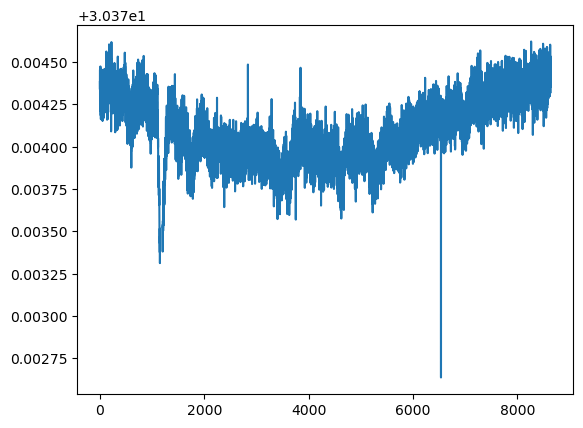

In [19]:
fig,ax=plt.subplots()
ax.plot(obs_cen_wave[11])

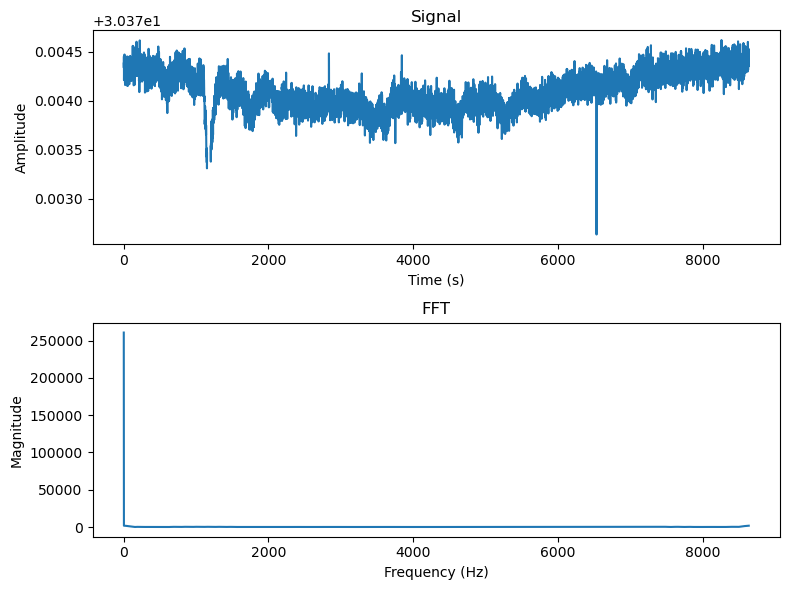

In [51]:
X = np.fft.fft(np.nan_to_num(obs_cen_wave[11]))

# Compute the frequency axis
freqs = np.fft.fftfreq(8640)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot( obs_cen_wave[11])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal')

ax[1].plot(np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('FFT')
# ax[1].set_xlim([-0.001,0.001])

plt.tight_layout()

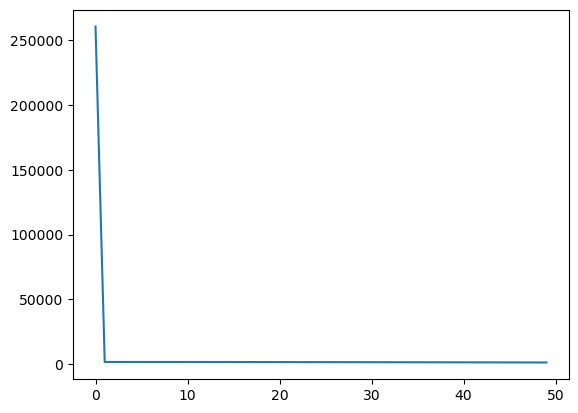

In [56]:
fig, ax = plt.subplots()
ax.plot(np.abs(X)[:50])

In [45]:
np.shape(freqs)

(8640,)

In [48]:
np.shape(X)

(8640,)

In [57]:
X[0]

(260700.92574078086+0j)

In [61]:
X[3]

(1456.2529741675053+932.663183413247j)

In [35]:
8640**-1

0.00011574074074074075

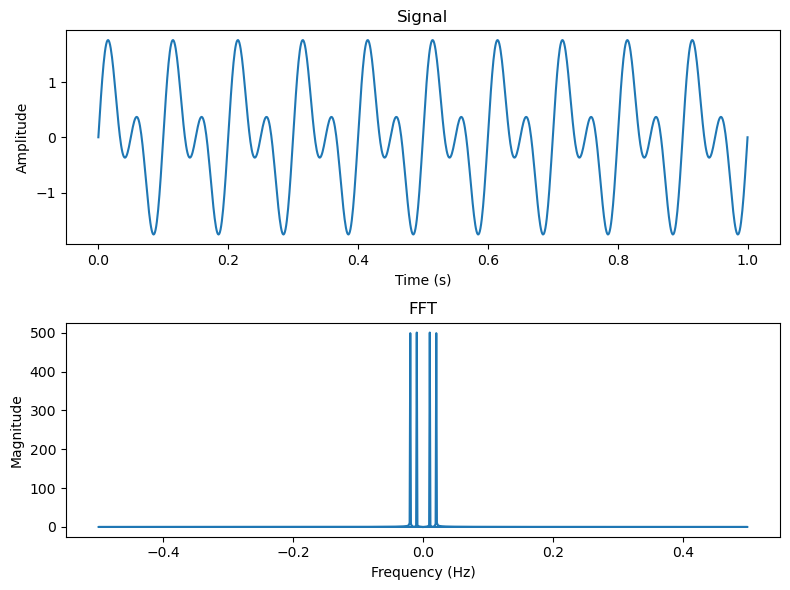

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the signal
N = 1000
t = np.linspace(0, 1, N)
x = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

# Compute the FFT
X = np.fft.fft(x)

# Compute the frequency axis
freqs = np.fft.fftfreq(N)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t, x)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal')

ax[1].plot(freqs, np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('FFT')

plt.tight_layout()

In [131]:
X

array([ 1.18064595e+07+3.66929598e-10j,  2.19623592e+01-4.43684272e+01j,
       -3.29456588e+00+4.40165906e+01j, ...,
       -1.33050522e+01-1.81253158e+01j, -3.29456588e+00-4.40165906e+01j,
        2.19623592e+01+4.43684272e+01j])

# Processing

## save a dict into npz

In [14]:
temp=obs_cen_wave

In [23]:
obs_cen_wave = {str(k): v for k, v in obs_cen_wave.items()}

In [24]:
obs_cen_wave

{'11': array([30.3743811 , 30.37433775, 30.37445438, ..., 30.37451108,
        30.37435202, 30.37442525]),
 '12': array([30.37429674, 30.37433193, 30.37448087, ..., 30.37422266,
        30.37424663, 30.37436124]),
 '13': array([30.37424214, 30.37434011, 30.37438492, ..., 30.37448186,
        30.37445229, 30.37438745]),
 '14': array([30.37439068, 30.37435911, 30.37416811, ..., 30.37423074,
        30.3742138 , 30.37430982]),
 '15': array([30.37416666, 30.37421266, 30.37425982, ..., 30.37405341,
        30.37435332, 30.37431698]),
 '16': array([30.37431439, 30.37422119, 30.37429075, ..., 30.37431739,
        30.37437411, 30.37416036]),
 '17': array([30.37426721, 30.37418408, 30.37422403, ..., 30.37429125,
        30.37430479, 30.3743965 ]),
 '18': array([30.37422407, 30.37422297, 30.37437429, ..., 30.37444435,
        30.37447344, 30.37437118]),
 '19': array([30.37421062, 30.37440283, 30.37431443, ..., 30.37443482,
        30.37434249, 30.37446458]),
 '21': array([30.37395797, 30.3739871

In [26]:
np.savez("central_wavelength.npz", **obs_cen_wave)

### read a npz

In [28]:
loaded_dict = np.load("central_wavelength.npz")

In [36]:
loaded_dict?

Type:        NpzFile
String form: <numpy.lib.npyio.NpzFile object at 0x000002190535F550>
Length:      47
File:        c:\users\14902\anaconda3\envs\sdo2022\lib\site-packages\numpy\lib\npyio.py
Docstring:  
NpzFile(fid)

A dictionary-like object with lazy-loading of files in the zipped
archive provided on construction.

`NpzFile` is used to load files in the NumPy ``.npz`` data archive
format. It assumes that files in the archive have a ``.npy`` extension,
other files are ignored.

The arrays and file strings are lazily loaded on either
getitem access using ``obj['key']`` or attribute lookup using
``obj.f.key``. A list of all files (without ``.npy`` extensions) can
be obtained with ``obj.files`` and the ZipFile object itself using
``obj.zip``.

Attributes
----------
files : list of str
    List of all files in the archive with a ``.npy`` extension.
zip : ZipFile instance
    The ZipFile object initialized with the zipped archive.
f : BagObj instance
    An object on which attribute can 

In [48]:
loaded_dict.files

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '61',
 '62']

In [51]:
loaded_dict={int(k): loaded_dict[k] for k in loaded_dict.files}

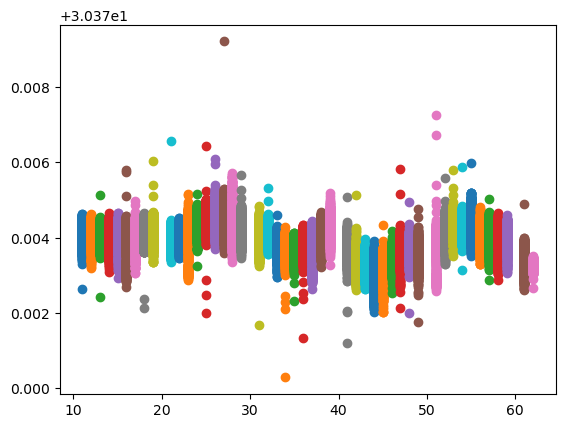

In [53]:
fig,ax=plt.subplots()
for key in loaded_dict.keys():
    key_list=np.tile(key, (8640, 1))
    ax.scatter(key_list,loaded_dict[key])

In [81]:
combined_array = np.concatenate(list(loaded_dict.values()))

In [82]:
# get the indices of the NaN values
nan_indices = np.isnan(combined_array)

# delete the NaN values using the indices
combined_array = np.delete(combined_array, np.where(nan_indices))

In [83]:
np.shape(combined_array)[0]

388703

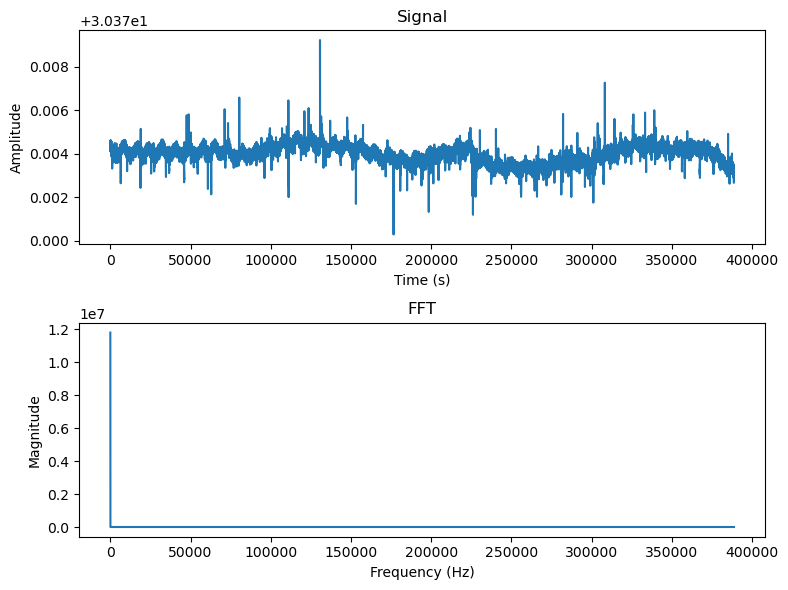

In [84]:
X = np.fft.fft(np.nan_to_num(combined_array))

# Compute the frequency axis
freqs = np.fft.fftfreq(np.shape(combined_array)[0])

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(combined_array)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal')

ax[1].plot(np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('FFT')
# ax[1].set_xlim([-0.001,0.001])

plt.tight_layout()

In [110]:
N=4000
# Define smoothing kernel
smoothing_kernel = np.ones(N) / N

# Apply convolution
smoothed_array = np.convolve(np.nan_to_num(combined_array), smoothing_kernel, mode='valid')

print(np.shape(smoothed_array))


(384704,)


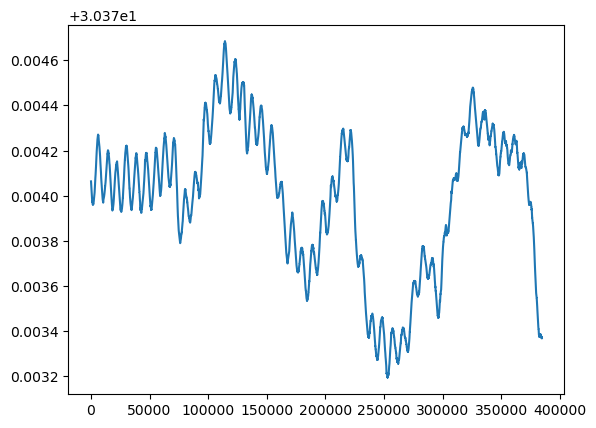

In [111]:
fig,ax=plt.subplots()
ax.plot(smoothed_array)
# ax.plot(    np.nan_to_num(combined_array) )

In [75]:
# Define input array
input_array = np.array([1, 2, 3, 4, 50, 
                        60, 700, 800, 9000, 10000])

# Define smoothing kernel
smoothing_kernel = np.ones(3) / 3

# Apply convolution
smoothed_array = np.convolve(input_array, smoothing_kernel, mode='same')

print(smoothed_array)


[1.00000000e+00 2.00000000e+00 3.00000000e+00 1.90000000e+01
 3.80000000e+01 2.70000000e+02 5.20000000e+02 3.50000000e+03
 6.60000000e+03 6.33333333e+03]


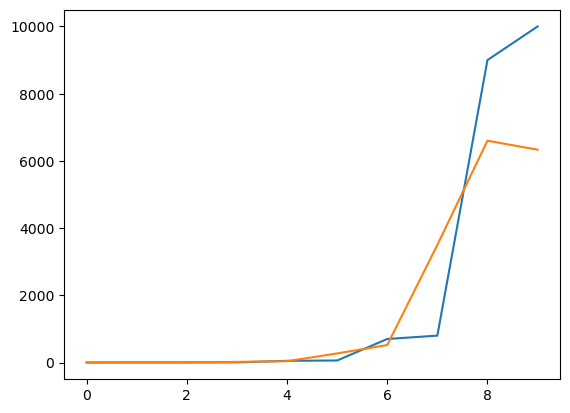

In [77]:
fig,ax=plt.subplots()
ax.plot(input_array)
ax.plot(smoothed_array)



In [129]:
def doppler_to_wavelength(std_wavelength, doppler_velocity):
    beta = doppler_velocity / const.c
    return (std_wavelength *beta).to(u.nm)

## save median

In [134]:
np.median(loaded_dict[11])

nan

In [135]:
loaded_dict[11]

array([30.3743811 , 30.37433775, 30.37445438, ..., 30.37451108,
       30.37435202, 30.37442525])

In [141]:
mean={}
for key in loaded_dict.keys():
    
    nan_indices = np.isnan(loaded_dict[key])

    temp = np.delete(loaded_dict[key], np.where(nan_indices))
    
    mean[key]=np.median(temp)

In [142]:
mean

{11: 30.37408671287927,
 12: 30.374089867179094,
 13: 30.374054606530134,
 14: 30.374055134384538,
 15: 30.374070524038963,
 16: 30.374059313309488,
 17: 30.37406324701104,
 18: 30.37412304029711,
 19: 30.37414980423501,
 21: 30.37390784841134,
 22: 30.373962951979934,
 23: 30.37412439110773,
 24: 30.374345632832053,
 25: 30.374522396096253,
 26: 30.374495036308694,
 27: 30.37439274773219,
 28: 30.374360881789748,
 29: 30.374334925159708,
 31: 30.374222495737847,
 32: 30.374082128896298,
 33: 30.37383779903757,
 34: 30.373759899115164,
 35: 30.373643456712433,
 36: 30.373742897719637,
 37: 30.373949754743737,
 38: 30.374070691243276,
 39: 30.37424083791474,
 41: 30.373785044007068,
 42: 30.373490394203603,
 43: 30.373372508074716,
 44: 30.373324847086344,
 45: 30.3733369697493,
 46: 30.37339631822673,
 47: 30.373631672355433,
 48: 30.373694588374747,
 49: 30.373577076422613,
 51: 30.373923353732774,
 52: 30.37414962266334,
 53: 30.37433321230297,
 54: 30.37432454453255,
 55: 30.3742974

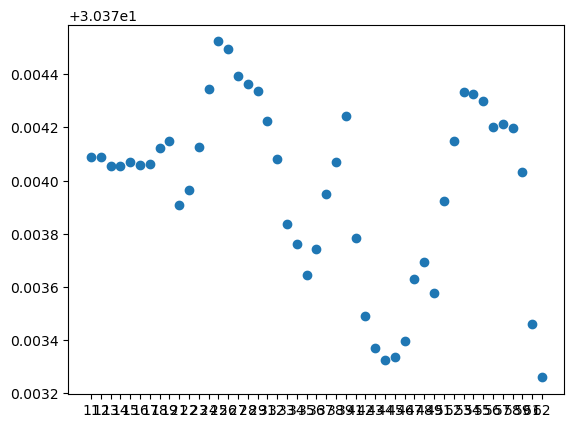

In [149]:
fig,ax=plt.subplots()
ax.scatter(mean.keys(),mean.values())

In [148]:
mean={str(k): v for k, v in mean.items()}
np.savez("daily_median.npz", **mean)

In [150]:
mean.keys()

dict_keys(['11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '45', '46', '47', '48', '49', '51', '52', '53', '54', '55', '56', '57', '58', '59', '61', '62'])